# Visualization of velocity for video-confimed events - experiment 4
VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'
dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')

dfratclean = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

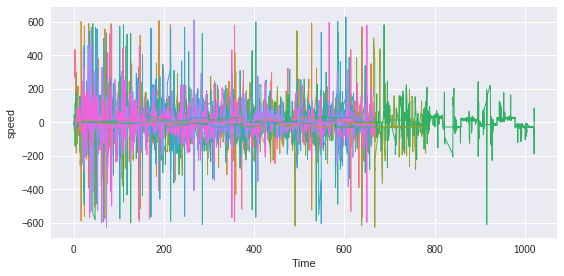

In [3]:
df = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])
df['subU'] = df['speed'] - df['U'] 

g = sns.FacetGrid(data=df, size=4, aspect=2, hue='session_id')
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);

In [4]:
dd2 = df[df['session_id']==4]

In [5]:
dfsession.video_name[4]

'VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU-Camera 11136'